<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/MAT422_HM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2.3

In [77]:
import numpy as np
import pandas as pd

# Import survey results
df = pd.read_csv('/content/ASB333_Survey.csv')

##Joint probability distributions

Back in my ASB 333 frauds and myths class I created a survey to see how many archeological myths people believed, there were five questiona and people rated how certain they were of the myth from strongly dissagree to strongly agree. Here is the joint prabability distribution.

Raw data

In [41]:
answer_order = ['Strongly disagree', 'Somewhat disagree', 'Unsure', 'Somewhat agree', 'Strongly agree']

# Melt the DataFrame to long format
df_melted = df.melt(id_vars=['Timestamp'], var_name='Question', value_name='Answer')

# Create pivot table
pivot_table = pd.pivot_table(df_melted, index='Question', columns='Answer', aggfunc='size', fill_value=0)
pivot_table = pivot_table[answer_order]

# Need longer display
pd.set_option('display.width', 180)

print(pivot_table)

Answer                                              Strongly disagree  Somewhat disagree  Unsure  Somewhat agree  Strongly agree
Question                                                                                                                        
Archaeologists have discovered an ancient race ...                  6                  1       3               3               1
Columbus was the first person to reach the Amer...                 10                  1       1               1               1
Extraterrestrials helped ancient Egyptians buil...                  6                  0       3               2               3
Psychics can help archaeologists locate hidden ...                  3                  2       3               2               4
The Lost Continent of Atlantis has been discove...                  7                  3       2               2               0


Actual jpd

In [92]:
# Define the mapping for broader categories (I want 3 categories not 5)
answer_mapping = {
    'Strongly disagree': 'Disagree',
    'Somewhat disagree': 'Disagree',
    'Unsure': 'Unsure',
    'Somewhat agree': 'Agree',
    'Strongly agree': 'Agree'
}

categories = ['Disagree', 'Unsure', 'Agree']

# Apply mapping
df_mapped = df.map(lambda x: answer_mapping.get(x, x) if isinstance(x, str) else x)

# get rid of the extra columns
belief_df = df_mapped.drop(columns=['The Lost Continent of Atlantis has been discovered. ',
                                    'Psychics can help archaeologists locate hidden sites.',
                                    'Columbus was the first person to reach the Americas.'])

# Rename beliefe columns (for simplicity)
belief_df['Belief in Giants'] = belief_df['Archaeologists have discovered an ancient race of human giants.']
belief_df['Belief in Extraterrestrials'] = belief_df['Extraterrestrials helped ancient Egyptians build the pyramids.']

# Create a crosstab to summarize the joint distribution
joint_distribution = pd.crosstab(belief_df['Belief in Giants'], belief_df['Belief in Extraterrestrials'],
                                 rownames=['Belief in Giants'], colnames=['Belief in Extraterrestrials'],
                                 dropna=False).reindex(index=categories, columns=categories, fill_value=0)

# Add 'Total' columns
joint_distribution['Total'] = joint_distribution.sum(axis=1)
joint_distribution.loc['Total'] = joint_distribution.sum(axis=0)

print(joint_distribution)

Belief in Extraterrestrials  Disagree  Unsure  Agree  Total
Belief in Giants                                           
Disagree                            5       1      1      7
Unsure                              0       1      2      3
Agree                               1       1      2      4
Total                               6       3      5     14


In [90]:
# Total number of responses
total_responses = joint_distribution.loc['Total', 'Total']

# Probability for each cell
probability_table = joint_distribution / total_responses

print(probability_table)

Belief in Extraterrestrials  Disagree    Unsure     Agree     Total
Belief in Giants                                                   
Disagree                     0.357143  0.071429  0.071429  0.500000
Unsure                       0.000000  0.071429  0.142857  0.214286
Agree                        0.071429  0.071429  0.142857  0.285714
Total                        0.428571  0.214286  0.357143  1.000000


#Correlation and Dependence

The Iris dataset is a basic machine learning dataset from sklearn. Each feature is as follows: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', find out how much each feature correlates to other feature

Correlation between sepal length and sepal width: -0.11756978413300208


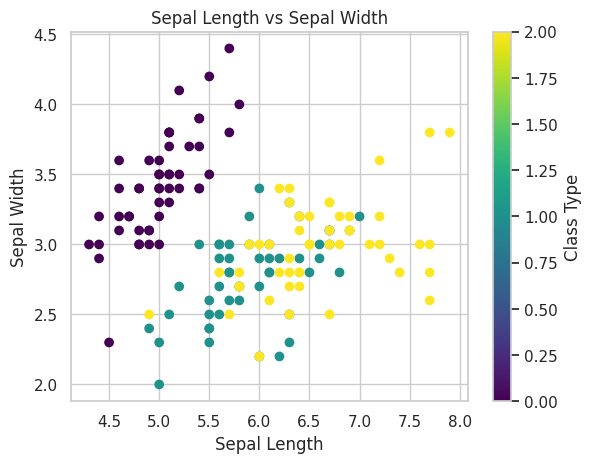

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Extract sepal length and sepal width
sepal_length = X[:, 0]
sepal_width = X[:, 1]

# Calculate the correlation coefficient
correlation = np.corrcoef(sepal_length, sepal_width)[0, 1]
print(f"Correlation between sepal length and sepal width: {correlation}")

# Plot the data
plt.scatter(sepal_length, sepal_width, c=Y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Class Type')
plt.show()


Correlation between sepal length and petal length: 0.8717537758865831


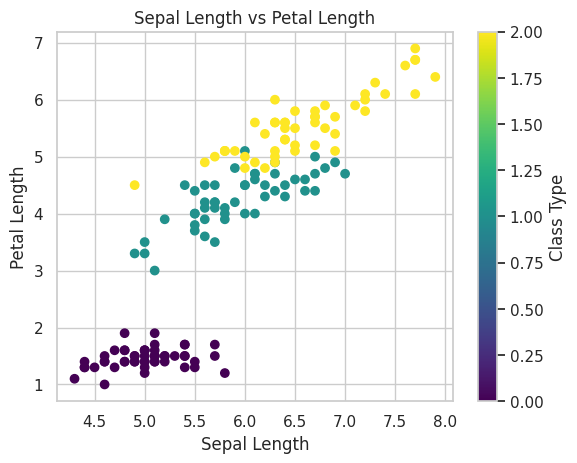

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# Extract sepal length and sepal width
sepal_length = X[:, 0]
petal_length = X[:, 2]

# Calculate the correlation coefficient
correlation = np.corrcoef(sepal_length, petal_length)[0, 1]
print(f"Correlation between sepal length and petal length: {correlation}")

# Plot the data
plt.scatter(sepal_length, petal_length, c=Y, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Sepal Length vs Petal Length')
plt.colorbar(label='Class Type')
plt.show()

There is terrible correlation between sepal length and width, but pretty good correlation between sepal legth and petal length

Also, the classes depend greatly sepal length and petal length, but less so on sepal width

#Random Samples